In [6]:
#hide
from utils import *
from fastai2.vision.widgets import *

In [7]:
# Bing web search key, get it from: https://azure.microsoft.com/en-us/try/cognitive-services/my-apis/
key = '???'

In [16]:
path=Path('.')

In [17]:
bear_types = 'selfie', 'healthy lungs x-ray', 'normal lungs x-ray','pneumonia lungs x-ray','covid-19 lungs x-ray', 'X-ray of lungs with SARS-CoV2','cancer lungs x-ray'

In [18]:
if not path.exists():
    path.mkdir(exist_ok=True)
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}',min_sz=500)
        download_images(dest, urls=results.attrgot('content_url'))    

In [19]:
fns = get_image_files(path)
failed = verify_images(fns)
failed
failed.map(Path.unlink);

In [20]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=43),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(do_flip=False, max_zoom=1.5, max_lighting=0.2, max_warp=0.1, p_affine=0.25,))

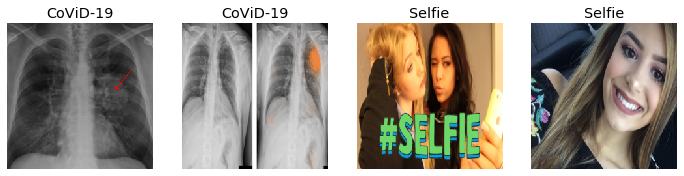

In [21]:
dls = bears.dataloaders(path, bs=64)

dls.valid.show_batch(max_n=4, nrows=1)

In [22]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [23]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.762863,1.929215,0.607450,00:10


/home/td0005/anaconda3/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/td0005/anaconda3/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,2.075735,1.607951,0.541547,00:10
1,1.968020,1.493068,0.532951,00:11
2,1.816698,1.496105,0.481375,00:10
3,1.646763,1.513815,0.510029,00:11
4,1.541760,1.460834,0.472779,00:11
5,1.434722,1.381622,0.455587,00:11
6,1.332835,1.363792,0.424069,00:10
7,1.235634,1.338214,0.424069,00:10
8,1.152849,1.335043,0.429799,00:11
9,1.119892,1.331581,0.441261,00:11


/home/td0005/anaconda3/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/td0005/anaconda3/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/td0005/anaconda3/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/td0005/anaconda3/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/td0005/anaconda3/lib/python3.7/site-packages/PIL/I

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

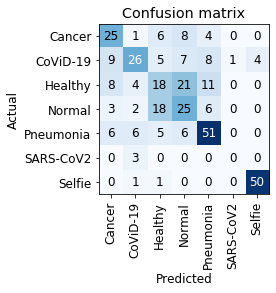

In [25]:
interp.plot_confusion_matrix()

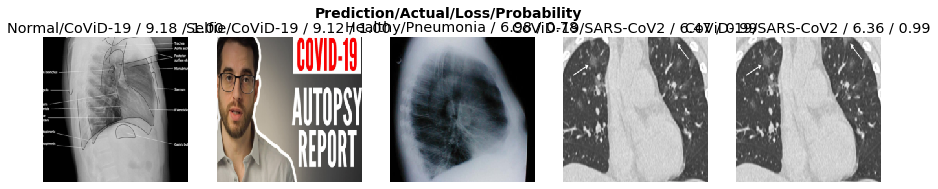

In [26]:
interp.plot_top_losses(5, nrows=1)

In [18]:
learn.export(fname='resnet18_224px.pkl')